## Import the required libraries

In [3]:
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.model_selection import train_test_split

## Import the cleaned data

In [5]:
# filepath = '/content/drive/MyDrive/Assignments/Self Case Study -1 (Nepal Earthquake)/'
filepath = ''

In [6]:
df = pd.read_csv(filepath+'df_cleaned.csv')

# Mapping geo location ids from integer to string datatype as there is no ordinal nature associated with the features 
df[['district_id', 'vdcmun_id', 'ward_id']] = df[['district_id', 'vdcmun_id', 'ward_id']].astype(str) 
df.head(5)

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,...,has_asset_cable_pre_eq,has_asset_computer_pre_eq,has_asset_internet_pre_eq,has_asset_telephone_pre_eq,has_asset_mobile_phone_pre_eq,has_asset_fridge_pre_eq,has_asset_motorcycle_pre_eq,has_asset_four_wheeler_family_use_pre_eq,has_asset_four_wheeler_commercial_use_pre_eq,has_asset_none_pre_eq
0,12,1207,120703,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,1,0,0,0,0,0
1,12,1207,120703,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,1,0,0,0,0,0
2,12,1207,120703,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,1,0,0,0,0,0
3,12,1207,120703,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,1,0,0,0,0,0
4,12,1207,120703,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,...,0,0,0,0,1,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747124 entries, 0 to 747123
Data columns (total 62 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   district_id                                   747124 non-null  object
 1   vdcmun_id                                     747124 non-null  object
 2   ward_id                                       747124 non-null  object
 3   count_floors_pre_eq                           747124 non-null  int64 
 4   age_building                                  747124 non-null  int64 
 5   plinth_area_sq_ft                             747124 non-null  int64 
 6   height_ft_pre_eq                              747124 non-null  int64 
 7   land_surface_condition                        747124 non-null  object
 8   foundation_type                               747124 non-null  object
 9   roof_type                                     747124 non-nu

## Exploratory Data Analysis

### Target variable

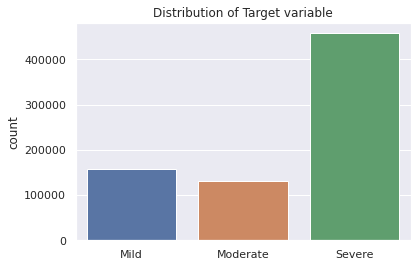

In [8]:
sns.countplot(sorted(df.severity_of_damage)).set_title('Distribution of Target variable')
plt.show()

In [9]:
df.severity_of_damage.value_counts(normalize=True)

Severe      0.612653
Mild        0.210444
Moderate    0.176902
Name: severity_of_damage, dtype: float64

1. We can see that data is imbalanced 
2. About 61% of data points are buildings with severe damage followed by 21% mild damage and 17.6% moderate damage


### Exploring Numerical features

#### Checking for correlated features

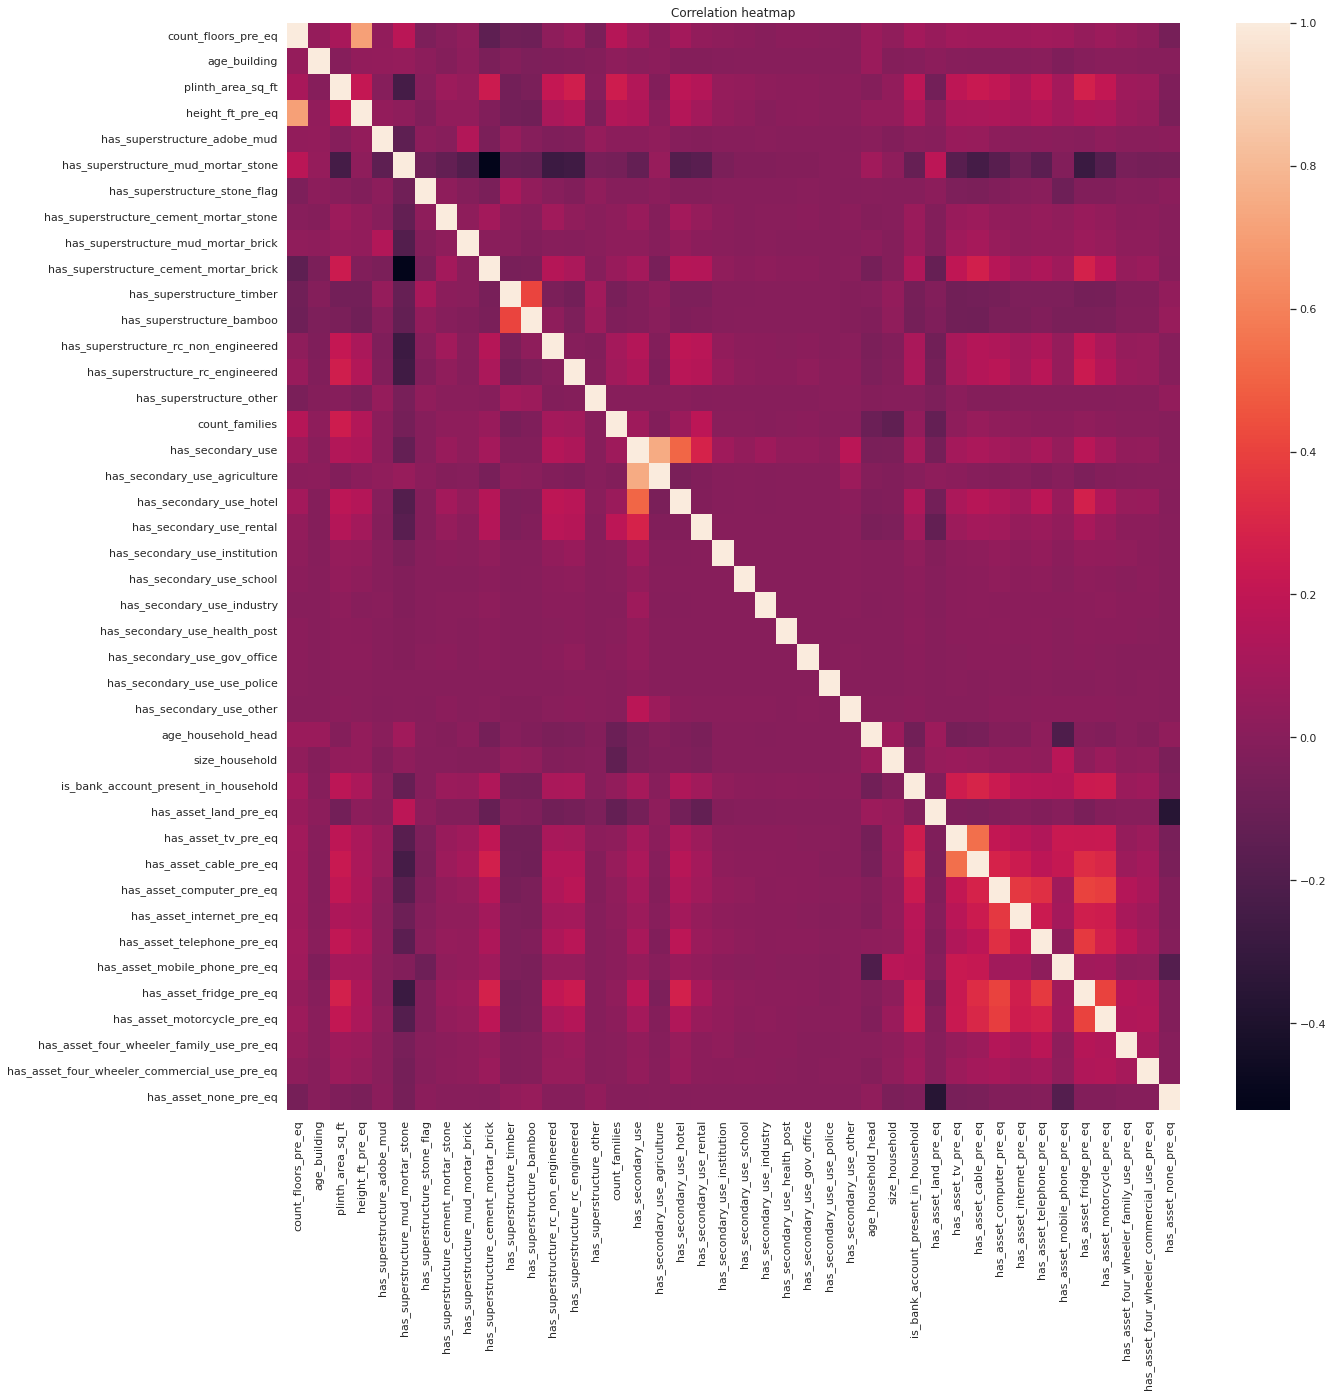

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())
plt.title('Correlation heatmap')
plt.show()

In [11]:
# Fetching the features with correlation greater than 0.8

# https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
[(corr_matrix.columns[x], corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

[]

In [12]:
# Correlation greater than 0.7
[(corr_matrix.columns[x], corr_matrix.columns[y], corr_matrix.iloc[x,y]) for x,y in zip(*np.where(corr_matrix >0.7)) if x!=y and x<y]

[('count_floors_pre_eq', 'height_ft_pre_eq', 0.7071032902696207),
 ('has_secondary_use', 'has_secondary_use_agriculture', 0.7459376590255633)]

We can see that there are no features with correlation greater than 0.8.
Features 'height_ft_pre_eq', 'count_floors_pre_eq' and 'has_secondary_use','has_secondary_use_agriculture' are slightly correlated

All numerical features are integer values that is discrete

In [13]:
# Separating numerical features which are one hot encoded and other
numerical_features = df.dtypes[df.dtypes == 'int'].index

has_superstructure_featues = []
has_seconday_use_features = []
has_asset_features = []
other_num_features = []

for feature in numerical_features:
    if 'has_superstructure' in feature:
        has_superstructure_featues.append(feature)
    elif 'has_secondary_use' in feature:
        has_seconday_use_features.append(feature)
    elif 'has_asset' in feature:
        has_asset_features.append(feature)
    else:
        other_num_features.append(feature)

#### Feature 'count_floors_pre_eq'

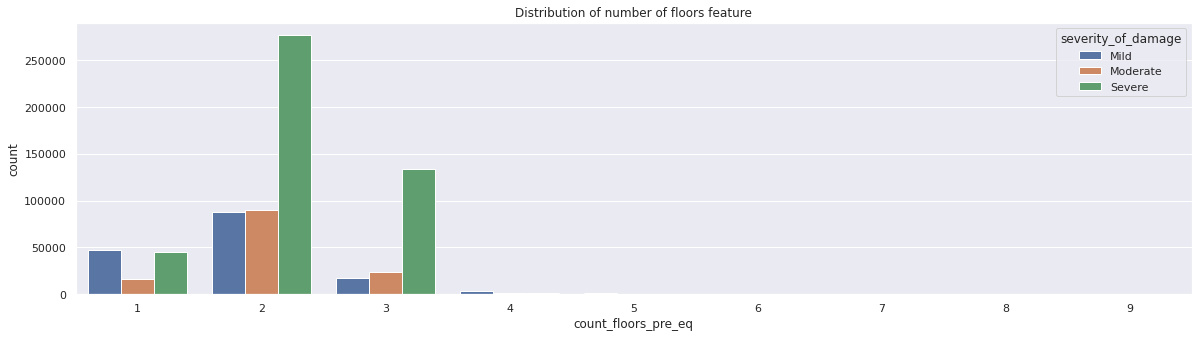

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(df['count_floors_pre_eq'], hue=df['severity_of_damage'], hue_order=sorted(df['severity_of_damage'].unique())).set_title('Distribution of number of floors feature')
plt.show()

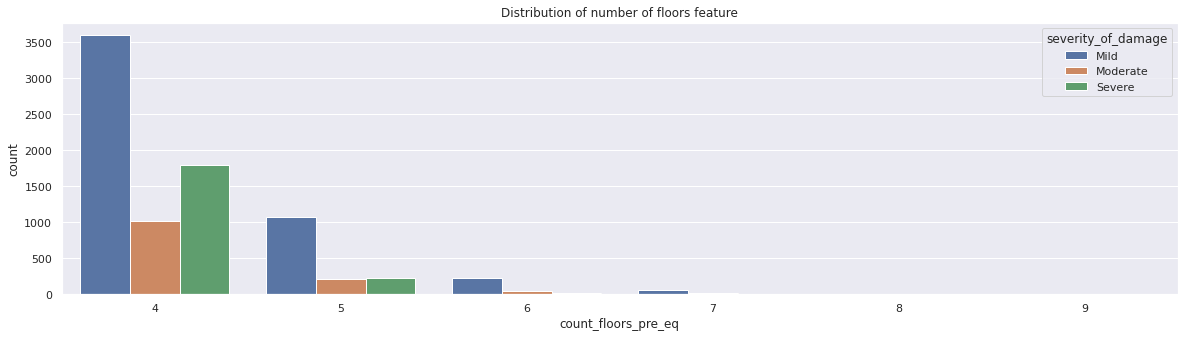

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(df['count_floors_pre_eq'][df.count_floors_pre_eq > 3], hue=df['severity_of_damage'],hue_order=sorted(df['severity_of_damage'].unique())).set_title('Distribution of number of floors feature')
plt.show()

We can see that the level of damage is higher in buildings with 2 or 3 number of floors whereas it is comparitively lower for buildings with floors 4 and above.

Number of floors is helpful in distinguishing classes

#### Feature 'age_building'

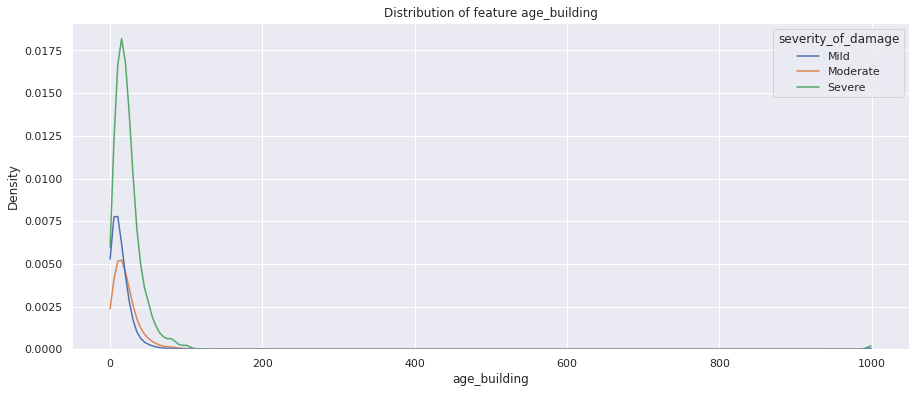

In [16]:
plt.figure(figsize=(15,6))
sns.kdeplot(df.age_building, hue=df.severity_of_damage, cut=df.age_building.min(), hue_order= sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature age_building')
plt.show()

We can see that data is heavily skewed. Lets check for outliers

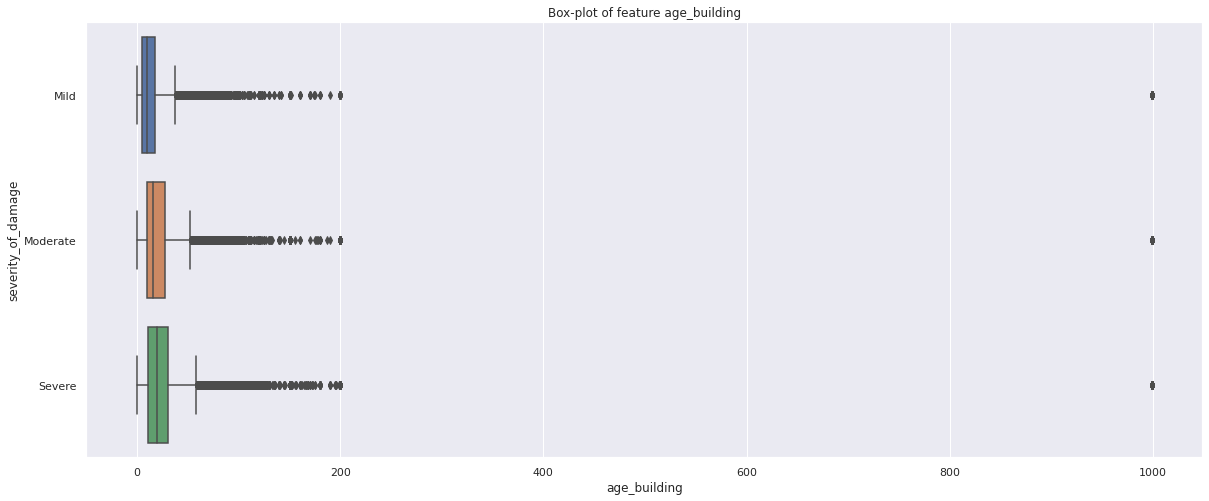

In [17]:
# Lets check for outliers
plt.figure(figsize=(20,8))
sns.boxplot(x='age_building', y='severity_of_damage', data=df, order=sorted(df['severity_of_damage'].unique())).set_title('Box-plot of feature age_building')
plt.show()

In [18]:
print('Number of buildings with age over 200: ', (df.age_building> 200).sum())

Number of buildings with age over 200:  3029


We will drop them

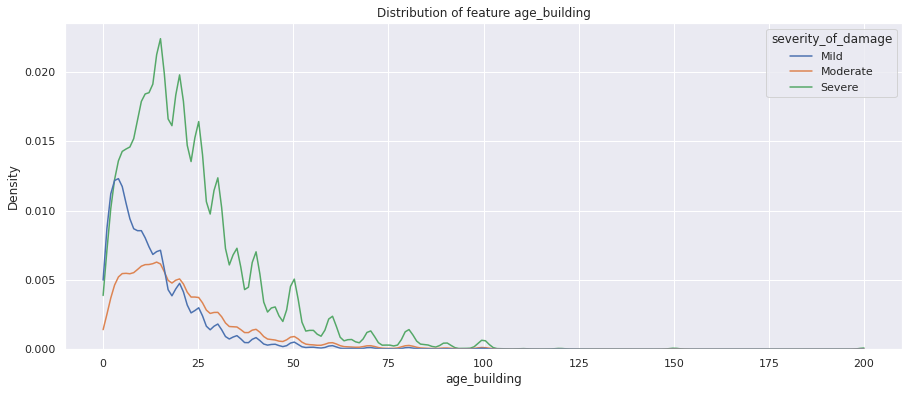

In [19]:
plt.figure(figsize=(15,6))
sns.kdeplot(df.age_building[df.age_building<=200], hue=df.severity_of_damage, cut=df.age_building.min(), hue_order= sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature age_building')
plt.show()

We can see that with increase in age of building, the severity of damage increases.

#### Feature 'plinth_area_sq_ft'

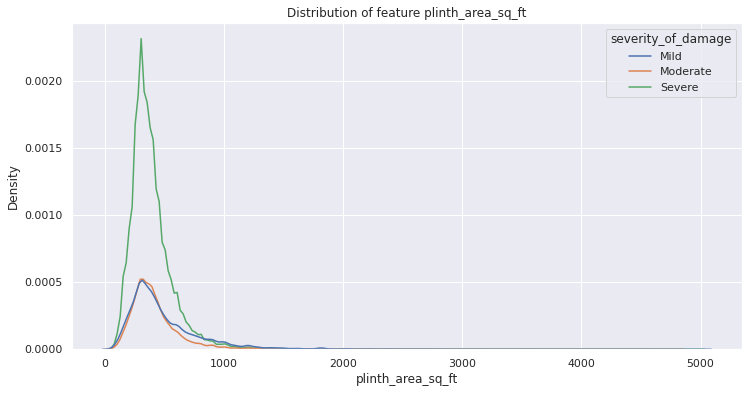

In [20]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['plinth_area_sq_ft'], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature plinth_area_sq_ft')
plt.show()

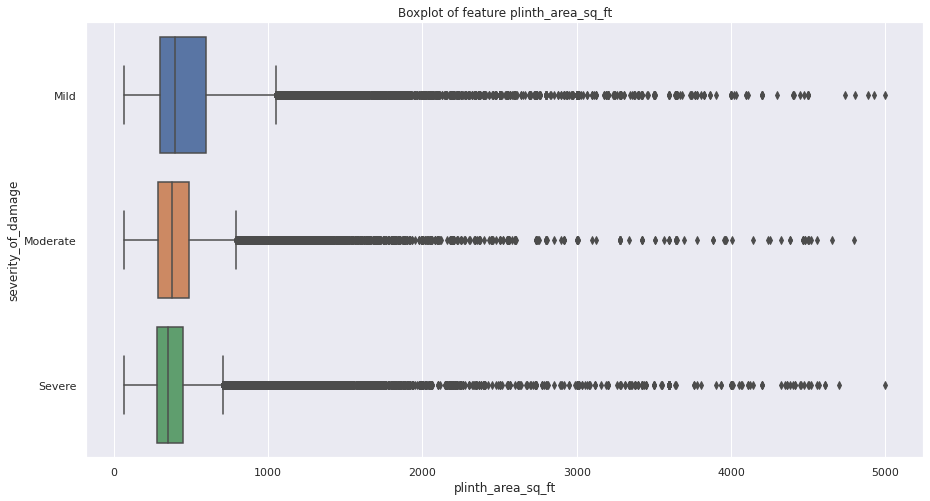

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(df['plinth_area_sq_ft'], y=df['severity_of_damage'], order=sorted(df['severity_of_damage'].unique())).set_title('Boxplot of feature plinth_area_sq_ft')
plt.show()

In [22]:
# Data skewness
df.plinth_area_sq_ft.skew()

3.7187402995731564

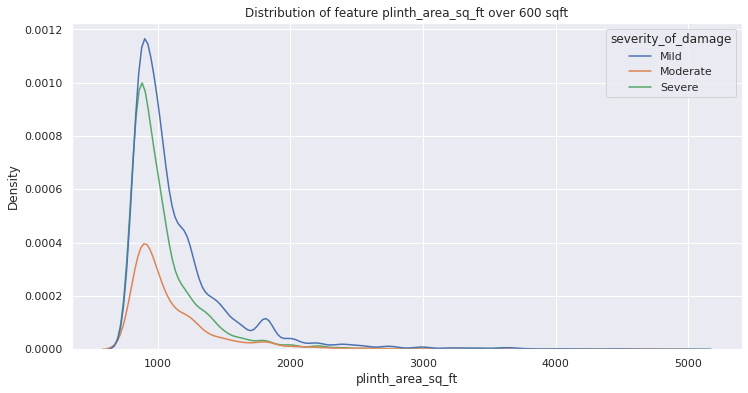

In [23]:
# Plinth area greater than 800 sqft
plt.figure(figsize=(12,6))
sns.kdeplot(df['plinth_area_sq_ft'][df.plinth_area_sq_ft>800], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature plinth_area_sq_ft over 600 sqft')
plt.show()

1. We see that the feature plinth area is skewed
2. We can see that buildings with larger plinth area are less susceptible to damage compared to that with smaller plinth area

#### Feature 'height_ft_pre_eq'

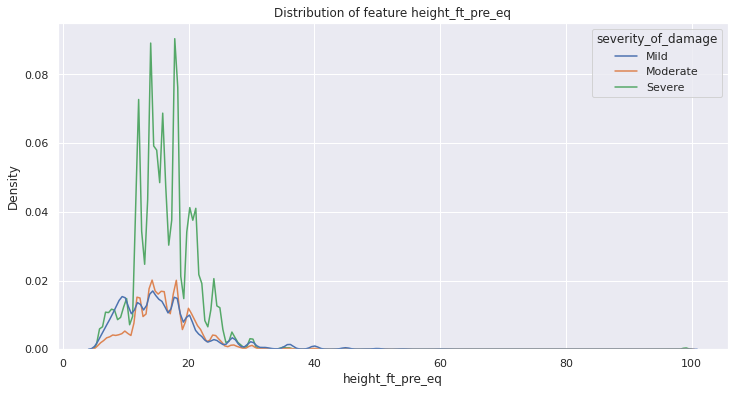

In [24]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['height_ft_pre_eq'], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature height_ft_pre_eq')
plt.show()

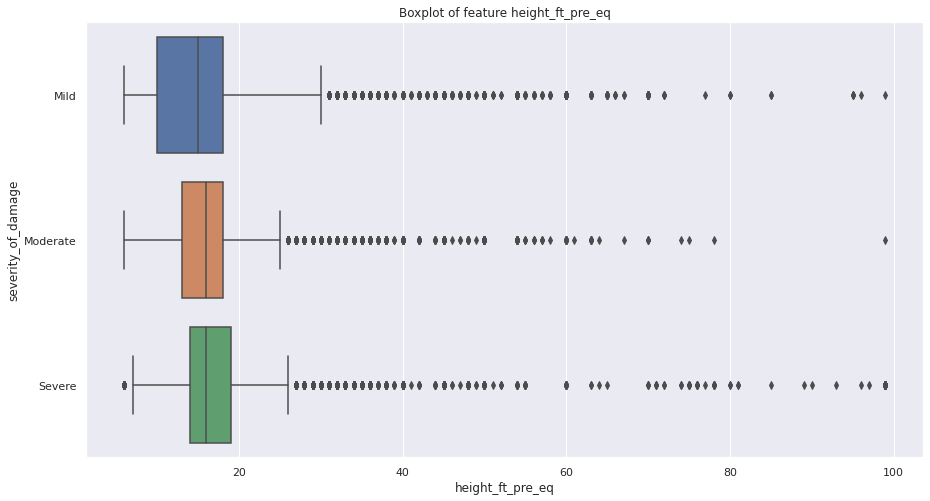

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(df['height_ft_pre_eq'], y = df['severity_of_damage'], order=sorted(df['severity_of_damage'].unique())).set_title('Boxplot of feature height_ft_pre_eq')
plt.show()

In [26]:
df.height_ft_pre_eq.skew()

2.461167840992677

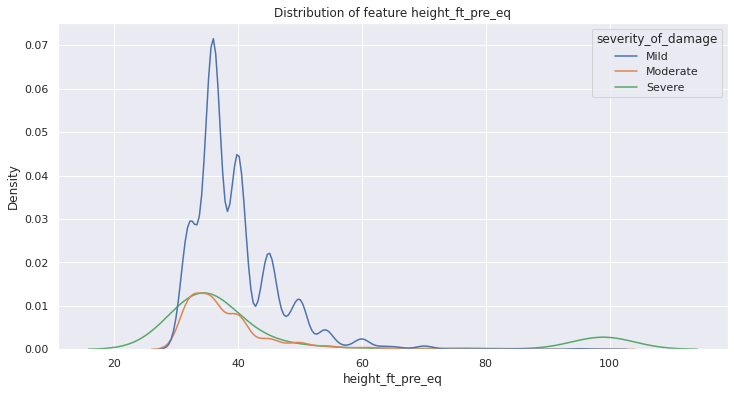

In [27]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['height_ft_pre_eq'][df.height_ft_pre_eq >30], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature height_ft_pre_eq')
plt.show()

1. Feature height of building is skewed
2. Level of damage is slightly less for buildings with height between 30 and 70 ft whereas it is more for buildings with height below 30 ft and over 90 ft

#### Feature 'count_families'

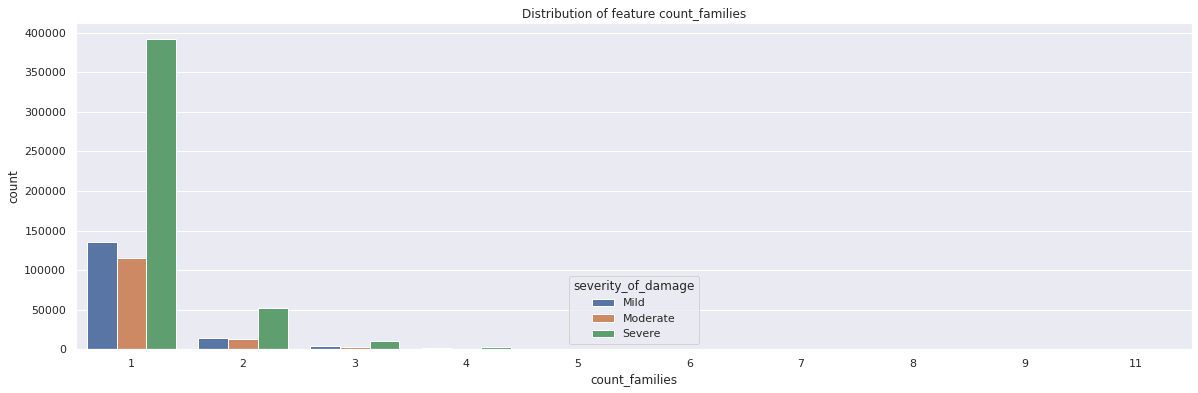

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(df['count_families'], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature count_families')
plt.show()

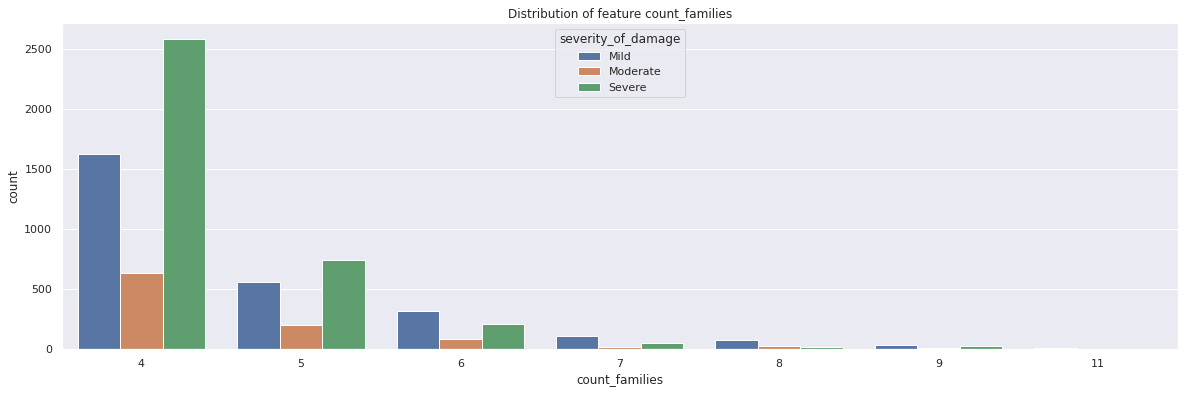

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(df['count_families'][df.count_families>3], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature count_families')
plt.show()

1. Majority of buildings have 1 household followed by 2 and so on.
2. Severity of damage is more for buildings with households 3 and below compared to 4 and above

#### Feature 'age_household_head'

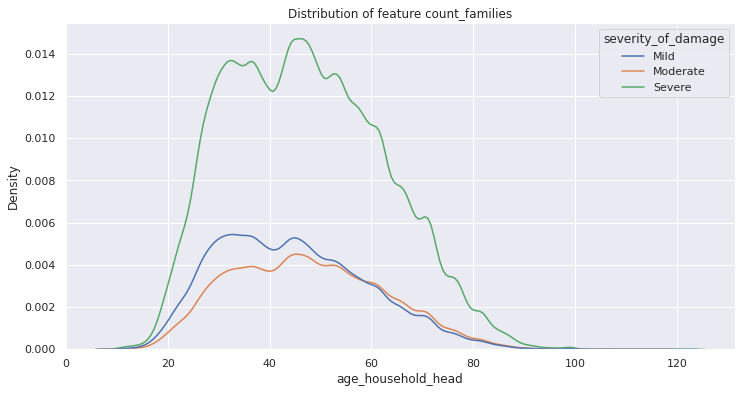

In [30]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['age_household_head'], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature count_families')
plt.show()

Probability that severity of damage is mild if age of household head is below 58 and moderate above that. However, density of severe damage is over all the ages of household head

#### Feature 'size_household'

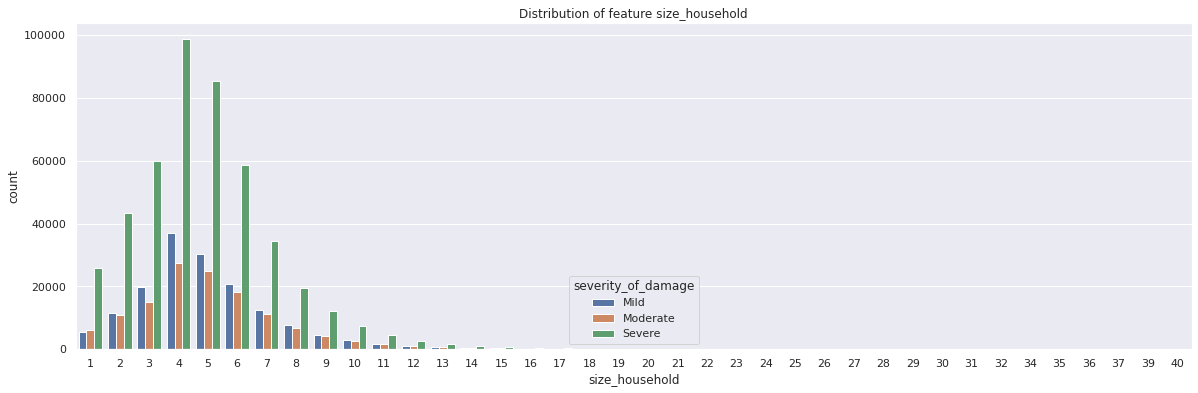

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(df['size_household'], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature size_household')
plt.show()

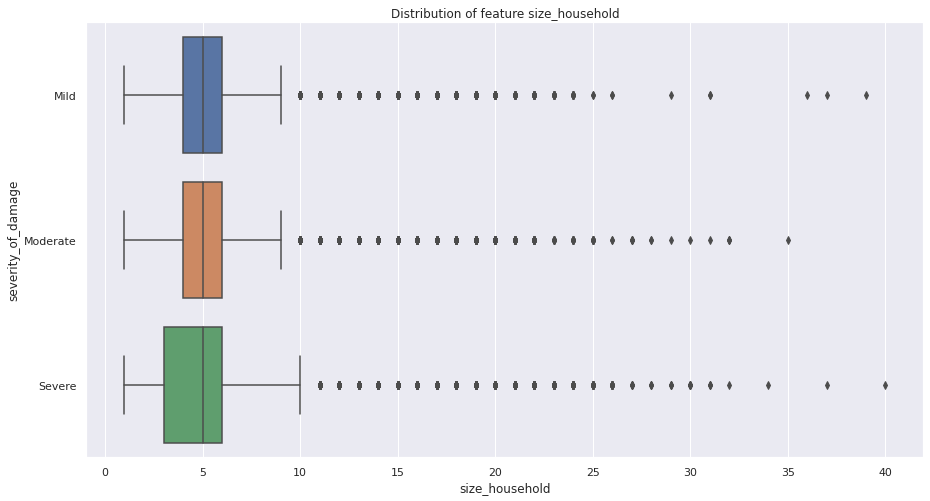

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(df['size_household'], y = df.severity_of_damage, order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature size_household')
plt.show()

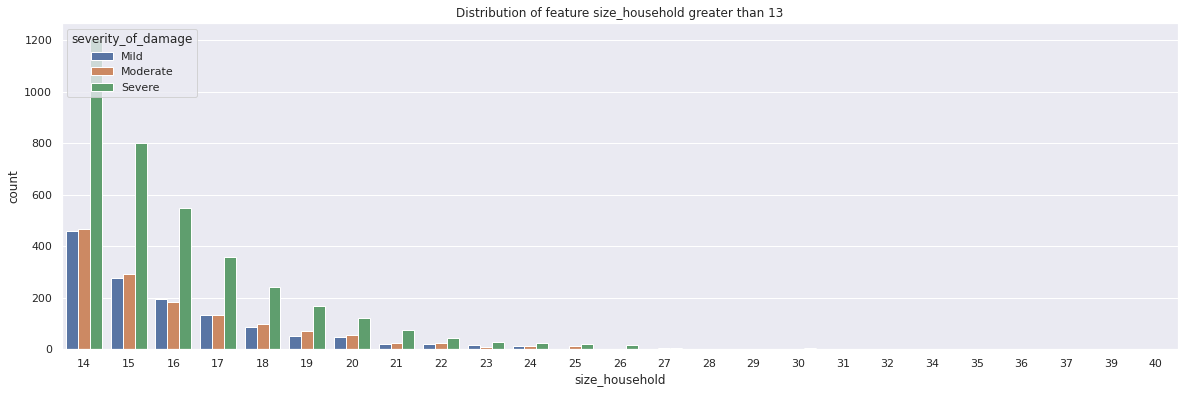

In [33]:
plt.figure(figsize=(20,6))
sns.countplot(df['size_household'][df.size_household>13], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature size_household greater than 13')
plt.show()

Looks like the severity is similar across the sizes of household

#### Feature 'is_bank_account_present_in_household'

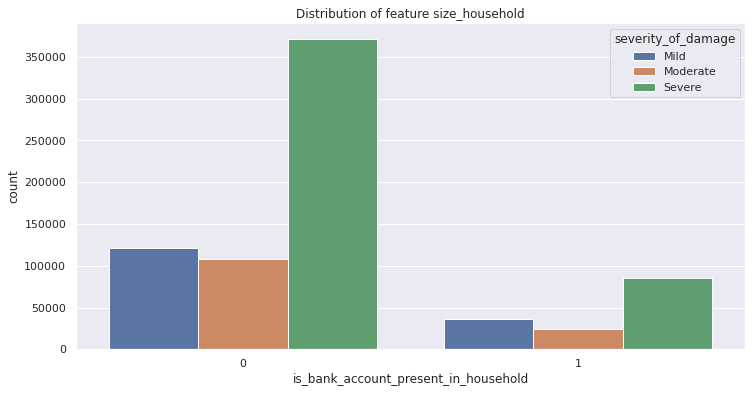

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(df['is_bank_account_present_in_household'], hue = df.severity_of_damage, hue_order = sorted(df['severity_of_damage'].unique())).set_title('Distribution of feature size_household')
plt.show()

1. Majority of households do not have bank account.
2. The proportion of mild severity to severe severity is more in households with bank account

#### Feature 'has_superstructure'

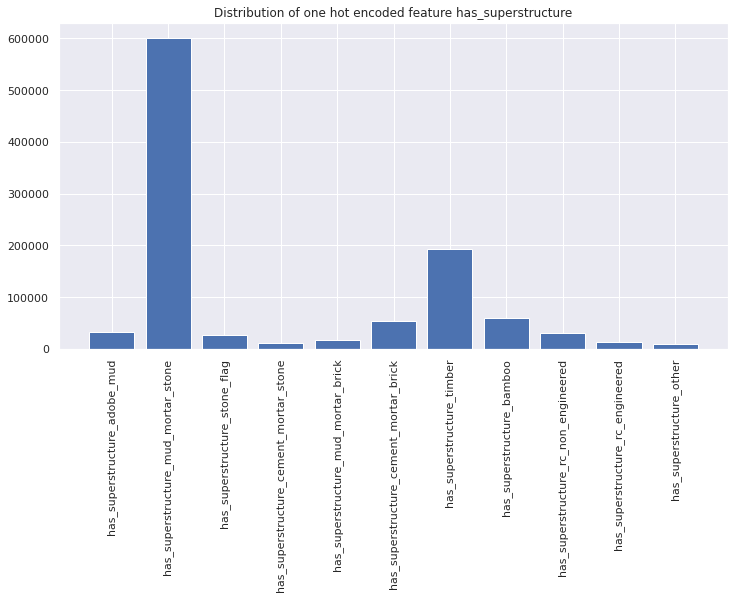

In [35]:
plt.figure(figsize=(12,6))
has_superstructure_counts = df[has_superstructure_featues].sum(axis=0)
plt.bar(has_superstructure_counts.index, height = has_superstructure_counts.values)
plt.title('Distribution of one hot encoded feature has_superstructure')
plt.xticks(rotation=90)
plt.show()

Majority of buildings have mud_mortar_stone superstructure followed by timber and other materials

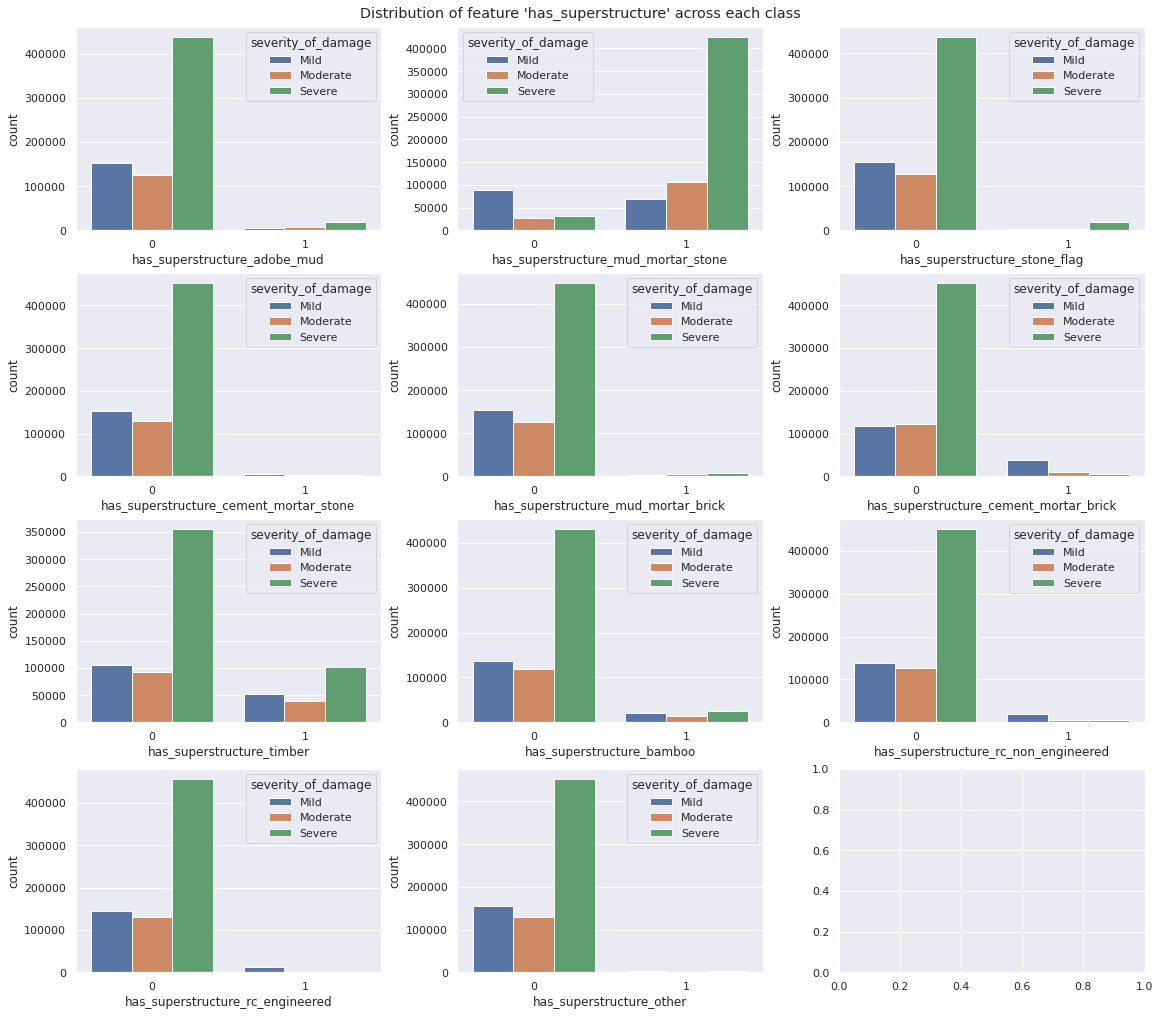

In [36]:
fig, axs = plt.subplots(4,3, figsize=(16,14), constrained_layout=True)

i, j = 0,0
for feature in has_superstructure_featues:
    sns.countplot(df[feature], hue=df.severity_of_damage, hue_order=sorted(df['severity_of_damage'].unique()), ax= axs[i,j])

    j += 1
    if j == 3:
        j = 0
        i += 1

plt.suptitle("Distribution of feature 'has_superstructure' across each class")
plt.show()

we can see that superstructure with cement_mortar_brick or reinforced_concrete or cement_mortar_stone can withstand earthquake to some extent compared to mud, mud_mortar_stone, etc

#### Feature 'has_secondary_use'

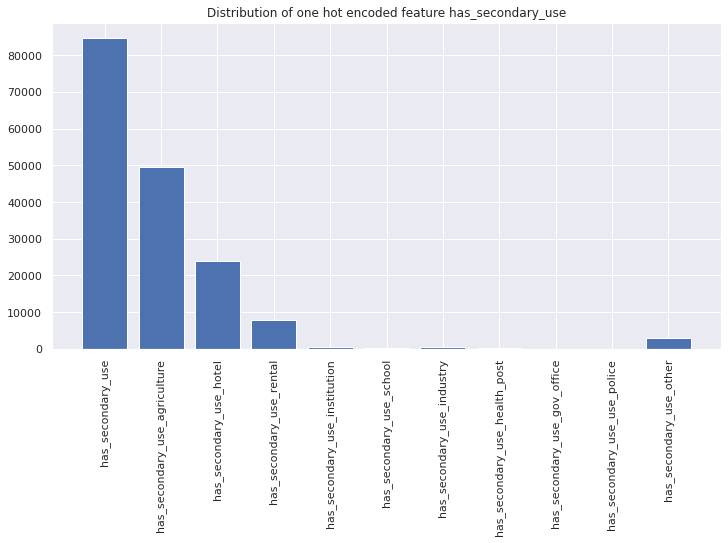

In [37]:
plt.figure(figsize=(12,6))
has_seconday_use_counts = df[has_seconday_use_features].sum(axis=0)
plt.bar(has_seconday_use_counts.index, height = has_seconday_use_counts.values)
plt.title('Distribution of one hot encoded feature has_secondary_use')
plt.xticks(rotation=90)
plt.show()

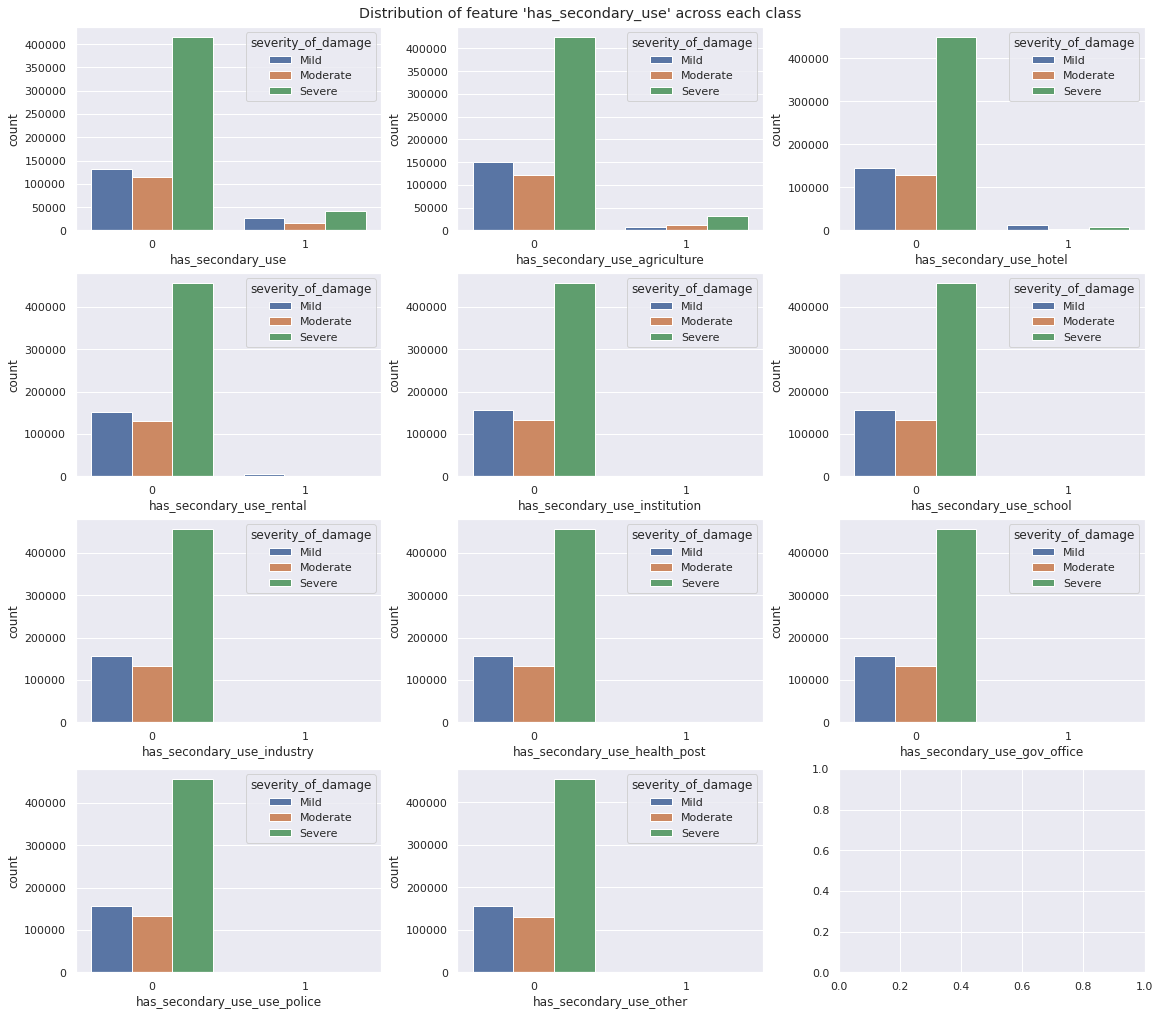

In [38]:
fig, axs = plt.subplots(4,3, figsize=(16,14), constrained_layout=True)

i, j = 0,0
for feature in has_seconday_use_features:
    sns.countplot(x= df[feature], hue=df.severity_of_damage, hue_order=sorted(df['severity_of_damage'].unique()), ax= axs[i,j])

    j += 1
    if j == 3:
        j = 0
        i += 1

plt.suptitle("Distribution of feature 'has_secondary_use' across each class")
plt.show()

In [39]:
num_buildings_secondary = len(df[has_seconday_use_features][df[has_seconday_use_features].sum(axis=1) > 0])
print('Number of buildings which are used more than one purpose:', num_buildings_secondary)

Number of buildings which are used more than one purpose: 84610


There are very few buildings compared to the number of data points that are used for more than one purpose.

#### Feature 'has_asset'

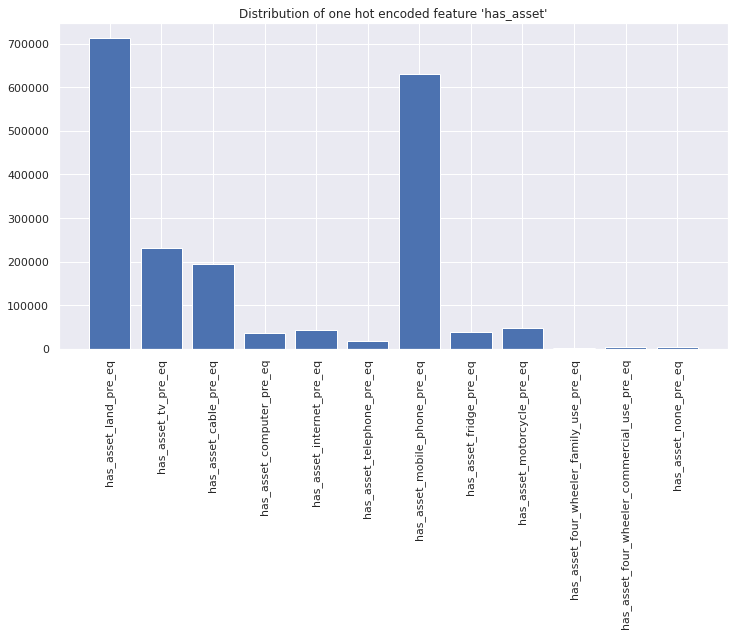

In [40]:
plt.figure(figsize=(12,6))
has_asset_counts = df[has_asset_features].sum(axis=0)
plt.bar(has_asset_counts.index, height = has_asset_counts.values)
plt.title("Distribution of one hot encoded feature 'has_asset'")
plt.xticks(rotation=90)
plt.show()

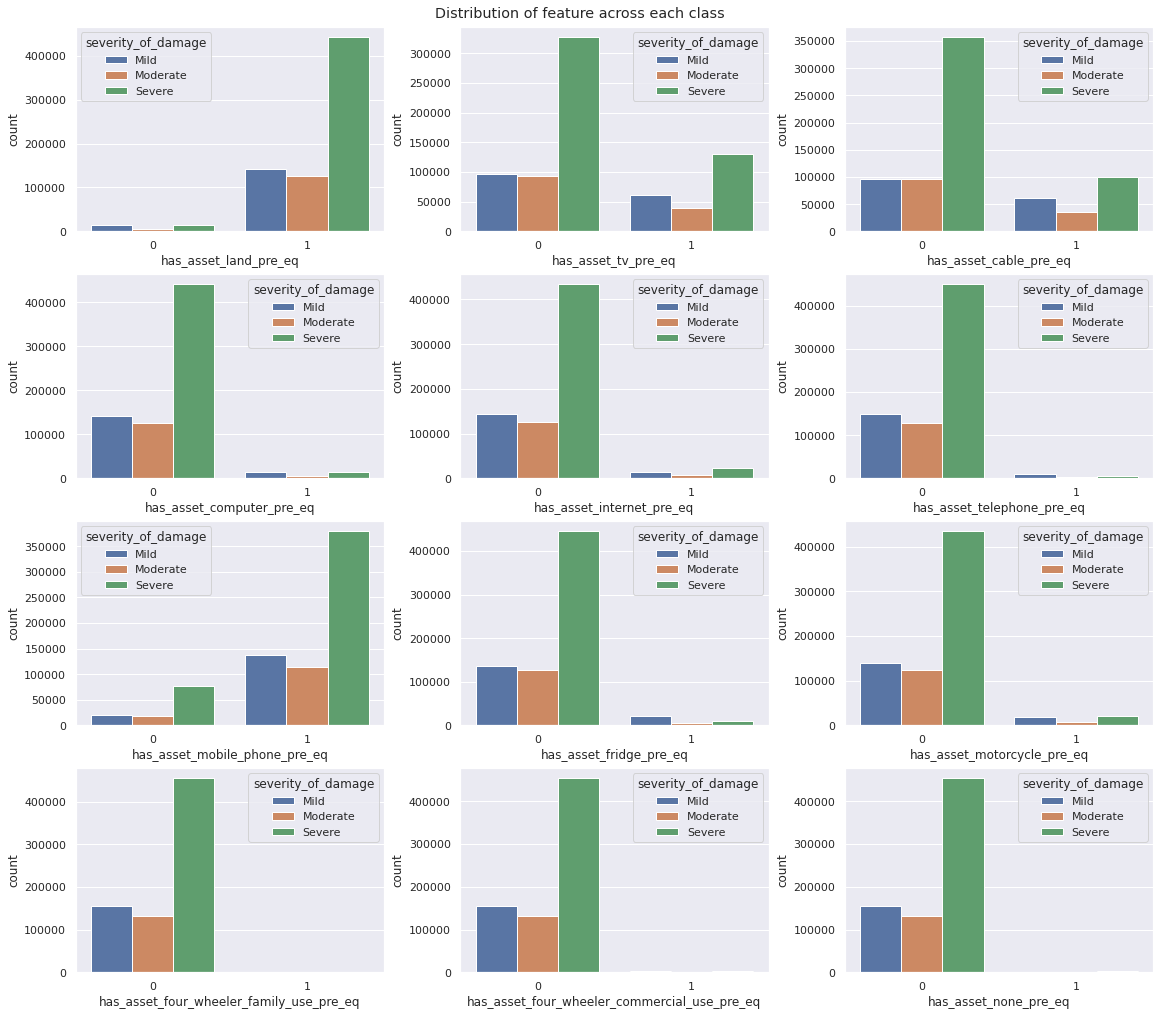

In [41]:
fig, axs = plt.subplots(4,3, figsize=(16,14), constrained_layout=True)

i, j = 0,0
for feature in has_asset_features:
    sns.countplot(df[feature], hue=df.severity_of_damage, hue_order=sorted(df['severity_of_damage'].unique()), ax= axs[i,j])

    j += 1
    if j == 3:
        j = 0
        i += 1

plt.suptitle('Distribution of feature across each class')
plt.show()

We can see that households having luxury items like fridge, motorcycle, etc have severity of damage low compared to others.

### Exploring categorical features

In [42]:
# prints number of unique values in each categorical variable
categorical_features = df.drop(['severity_of_damage'], axis=1).dtypes[df.dtypes == 'object'].index

for feature in categorical_features:
    unique_values = df[feature].nunique()
    print('Number of unique values in feature', feature, ':', unique_values)

Number of unique values in feature district_id : 11
Number of unique values in feature vdcmun_id : 110
Number of unique values in feature ward_id : 945
Number of unique values in feature land_surface_condition : 3
Number of unique values in feature foundation_type : 5
Number of unique values in feature roof_type : 3
Number of unique values in feature ground_floor_type : 5
Number of unique values in feature other_floor_type : 4
Number of unique values in feature position : 4
Number of unique values in feature plan_configuration : 10
Number of unique values in feature legal_ownership_status : 4
Number of unique values in feature gender_household_head : 2
Number of unique values in feature caste_household : 96
Number of unique values in feature education_level_household_head : 19
Number of unique values in feature income_level_household : 5
Number of unique values in feature source_water_pre_eq : 7
Number of unique values in feature source_cooking_fuel_pre_eq : 6
Number of unique values i

We will embed high cardinal features while preprocessing

#### Feature 'land_surface_condition'

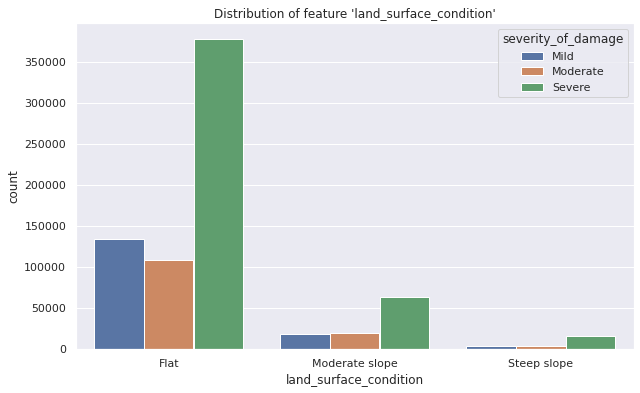

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(df.land_surface_condition, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'land_surface_condition'")
plt.xlabel('land_surface_condition')
plt.show()

1. Majority of buildings are built on flat surface
2. Level of damage has almost same proportion across all surface types

#### Feature 'foundation_type'

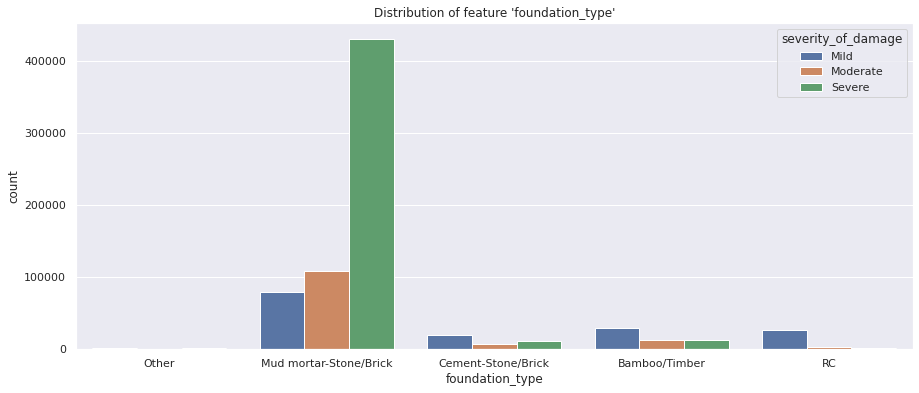

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(df.foundation_type, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'foundation_type'")
plt.xlabel('foundation_type')
plt.show()

1. Majority of buildings foundation is mud_mortar_stone_brick
2. Level of damage is low if foundation type is reinforced concrete or cement_stone_brick or bamboo/timber

#### Feature 'roof_type'

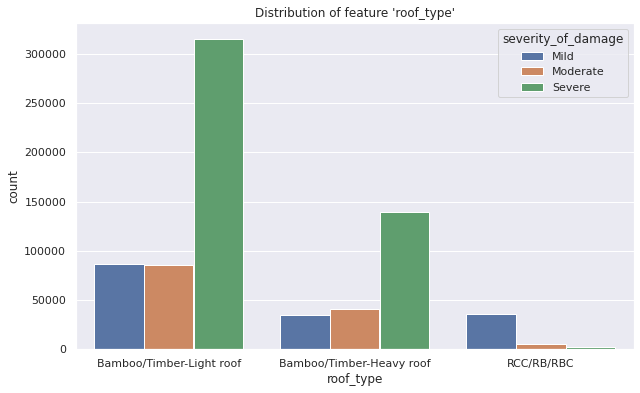

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(df.roof_type, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'roof_type'")
plt.xlabel('roof_type')
plt.show()

1. Majority of buildings have bamboo_timber heavy or light roof
2. Level of damage is low if roof is made up of rcc_rb_rbc

#### Feature 'ground_floor_type'

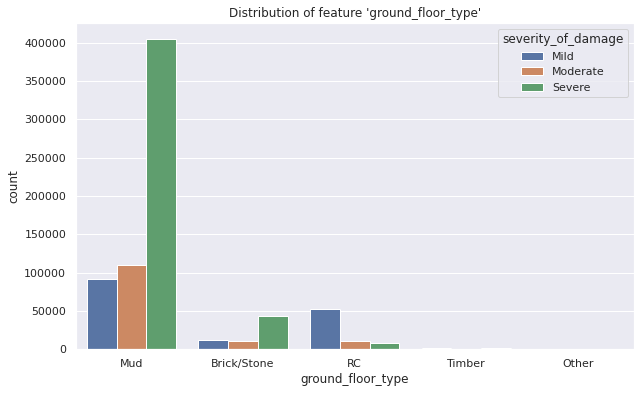

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(df.ground_floor_type, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'ground_floor_type'")
plt.xlabel('ground_floor_type')
plt.show()

1. Majority of buildings have mud ground_floor
2. Level of damage is low if ground floor is reinforced concrete

#### Feature 'other_floor_type'

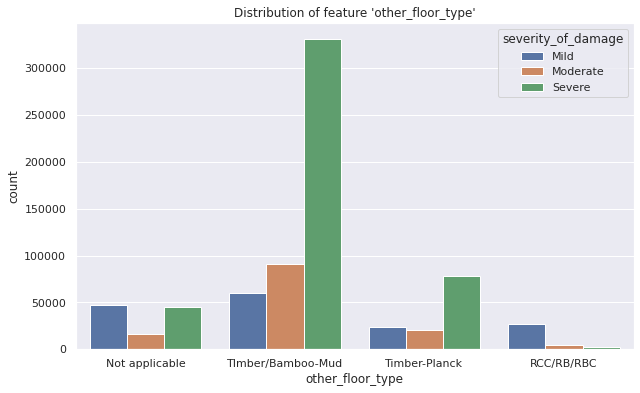

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df.other_floor_type, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'other_floor_type'")
plt.xlabel('other_floor_type')
plt.show()

1. Majority of buildings have other floor types of timber_bamboo_mud
2. Some buildings are single floor only. Hence, not applicable
3. Level of damage is low if they are made up of reinforced concrete

#### Feature 'position'

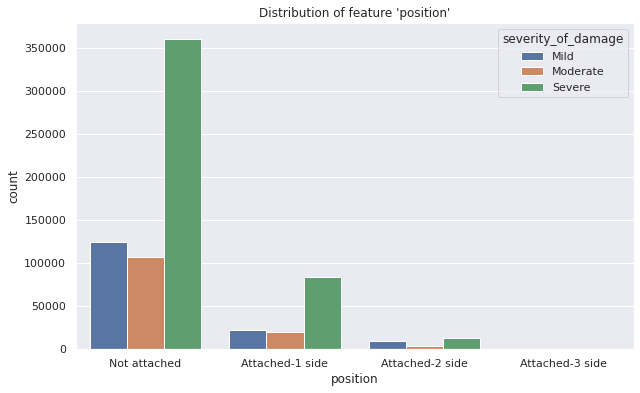

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(df.position, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'position'")
plt.xlabel('position')
plt.show()

1. Majority of buildings are standalone. No walls are attached with other buildings
2. Level of damage is more if buildings are not attached compared to one side and two-side

#### Feature 'plan_configuration'

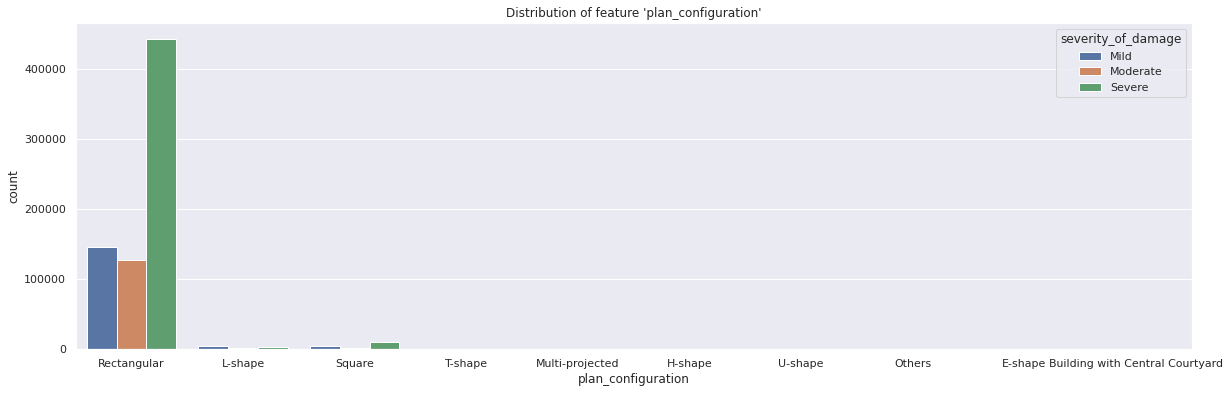

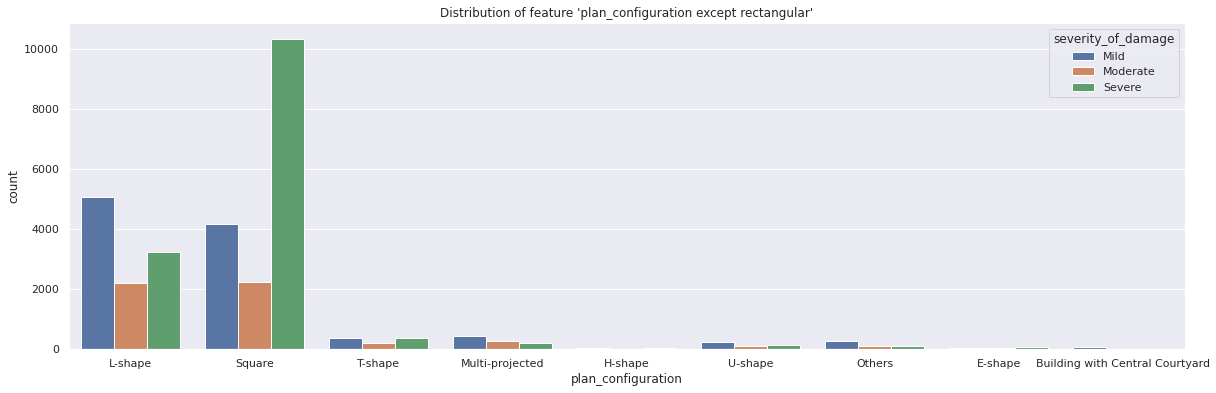

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(df.plan_configuration, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'plan_configuration'")
plt.xlabel('plan_configuration')
plt.show()

plt.figure(figsize=(20,6))
sns.countplot(df.plan_configuration[df.plan_configuration !='Rectangular'], hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'plan_configuration except rectangular'")
plt.xlabel('plan_configuration')
plt.show()

1. We can see that almost of the buildings have rectangular plan configuration. 
2. The bottom graph shows without rectangular plan configuration.
3. We can see that the level of damage is comparitively lower for L-shape,  T-shape, multi-projected, U-shape or others compared to rectangular and square

#### Feature 'legal_ownership_status'

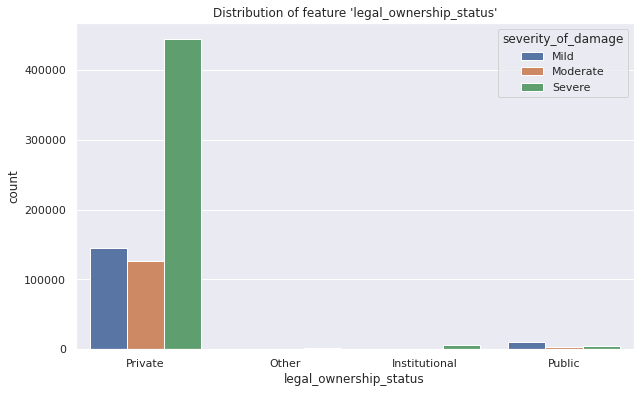

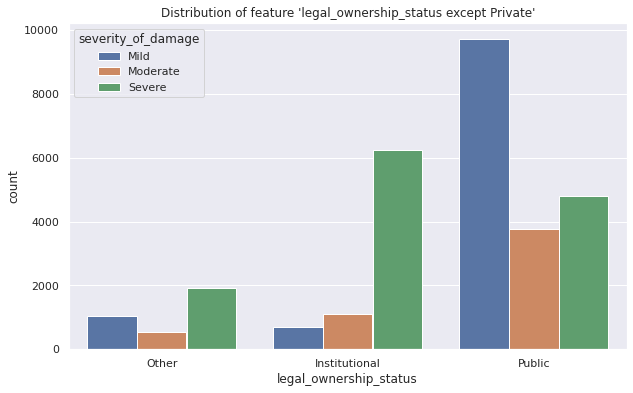

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(df.legal_ownership_status, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'legal_ownership_status'")
plt.xlabel('legal_ownership_status')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(df.legal_ownership_status[df.legal_ownership_status != 'Private'], hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'legal_ownership_status except Private'")
plt.xlabel('legal_ownership_status')
plt.show()

1. Majority of buildings belong to private individuals
2. However, Public buildings have slight advantage over other

#### Feature 'gender_household_head'

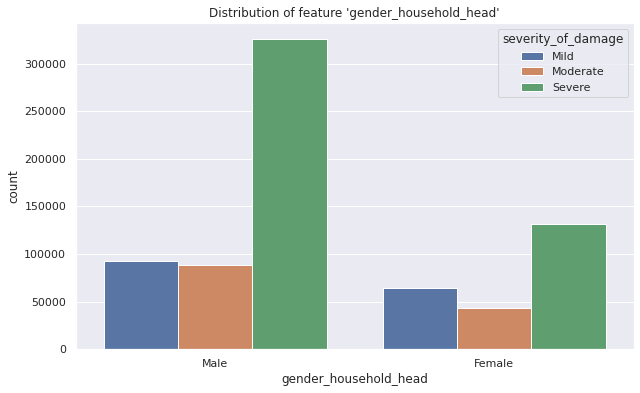

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(df.gender_household_head, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'gender_household_head'")
plt.xlabel('gender_household_head')
plt.show()

1. Majority buildings have male household head
2. Probability of severity of damage is slightly higher in case of gender_household head male

#### Feature 'income_level_household'

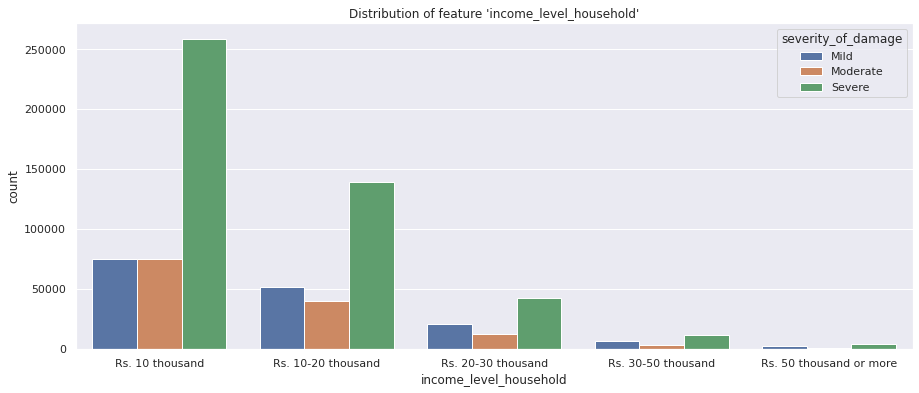

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(df.income_level_household, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'income_level_household'")
plt.xlabel('income_level_household')
plt.show()

1. Majority of building owners have income below Rs.20K
2. Level of damage is almost in the same proportion across all income levels

#### Feature 'source_water_pre_eq'

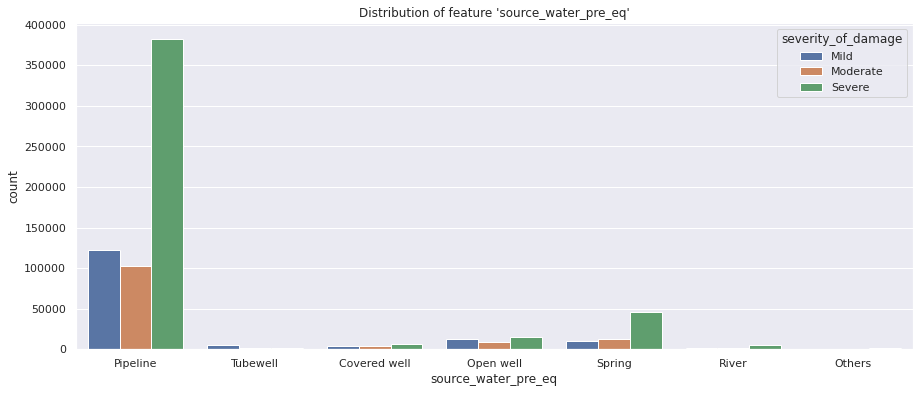

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(df.source_water_pre_eq, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'source_water_pre_eq'")
plt.xlabel('source_water_pre_eq')
plt.show()

1. Majority of buildings water supply is fulfilled through pipelines followed by spring
2. Level of damage is comparitively higher for buildings with water_source pipeline/spring
3. Level of damage is less for buildings with water_source tubewell, openwell, or covered well. 
May be these are remote areas and less densely populated  

#### Feature 'source_cooking_fuel_pre_eq'

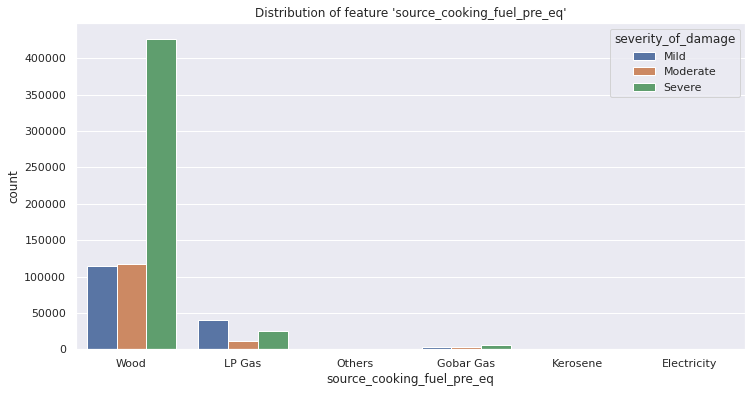

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(df.source_cooking_fuel_pre_eq, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'source_cooking_fuel_pre_eq'")
plt.xlabel('source_cooking_fuel_pre_eq')
plt.show()

1. Majority of buildings cooking fuel source is wood
2. Level of damage is higher for buildings that use wood as source compared to lp_gas 

#### Feature 'source_light_pre_eq'

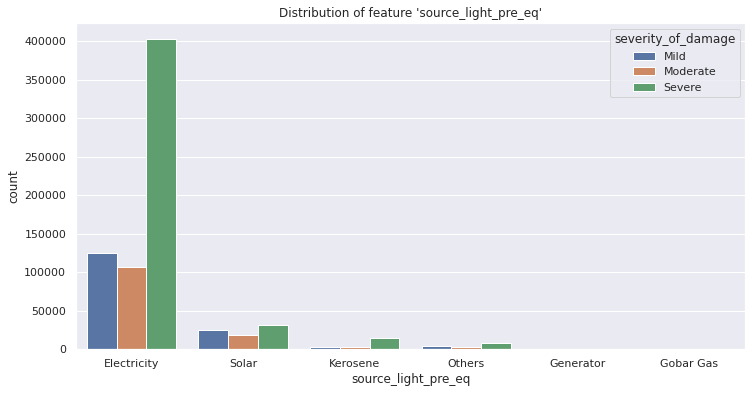

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(df.source_light_pre_eq, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'source_light_pre_eq'")
plt.xlabel('source_light_pre_eq')
plt.show()

1. Majority of buildings source of light is electricity
2. Level of damage is higher for buildings with source electricity compared to other sources


#### Feature 'type_toilet_pre_eq'

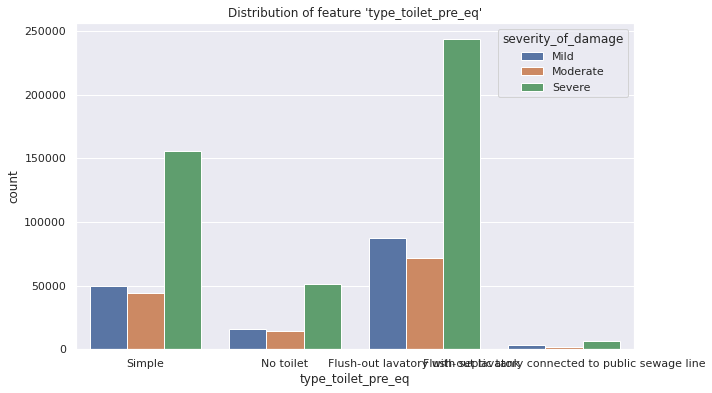

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(df.type_toilet_pre_eq, hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique())).set_title("Distribution of feature 'type_toilet_pre_eq'")
plt.xlabel('type_toilet_pre_eq')
plt.show()

1. Majority of buildings have flush_out_lavatory_with_septic tank or simple ones
2. Level of damage is not very well distinguishable based on this feature

#### Feature 'district_id'

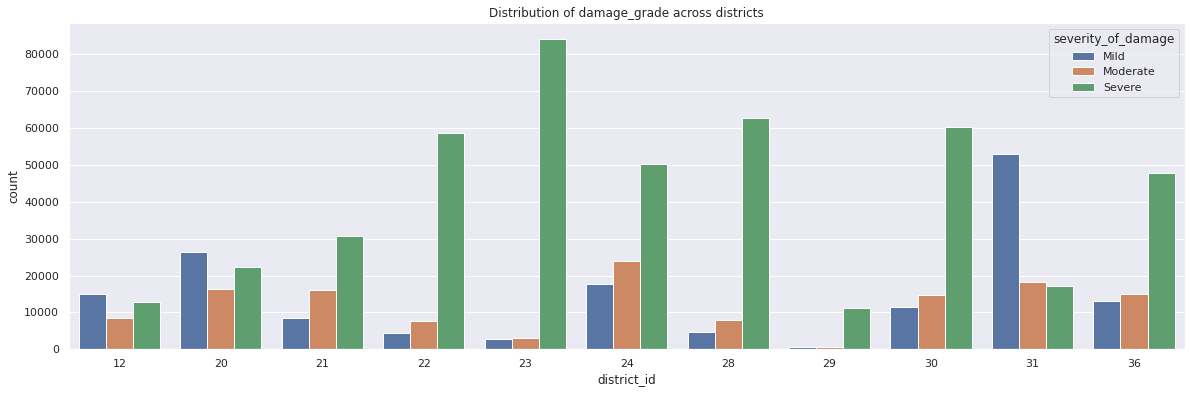

In [57]:
# Feature district_name
plt.figure(figsize=(20,6))
sns.countplot(x= df['district_id'], hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique()))
plt.title('Distribution of damage_grade across districts')
plt.show()

We can see that the severity of damage is higher in districts represented by ids 23,22,28,30,24,36,29, 21 compared to 31,12 and 20
This feature is useful in predicting the severity of damage

#### Feature 'vdcmun_id'

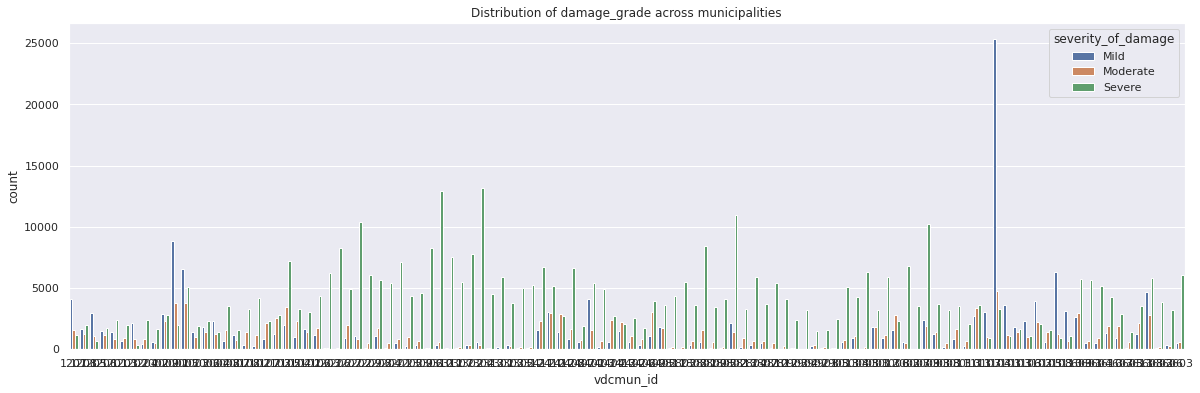

In [58]:
plt.figure(figsize=(20,6))
sns.countplot(df['vdcmun_id'], hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique()))
plt.title('Distribution of damage_grade across municipalities')
plt.show()

We can see that there are few municipalities, where the severity is very mild and in some municipalities it is high. The feature will be helpful 

Similarly for features 'ward_id' and 'caste_household' which are high cardinal features and will use categorical embedding to embed them

#### Feature 'education_level_household_head

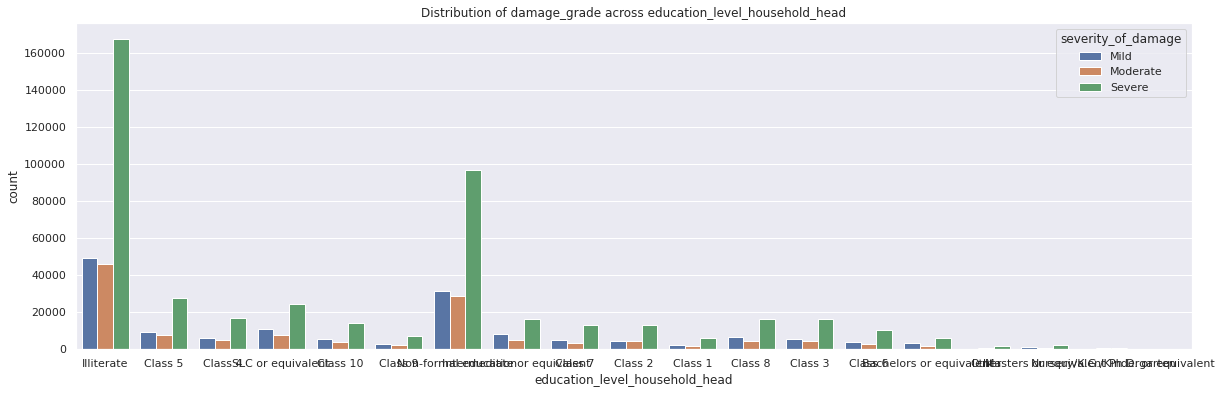

In [59]:
plt.figure(figsize=(20,6))
sns.countplot(df['education_level_household_head'], hue=df.severity_of_damage, hue_order=sorted(df.severity_of_damage.unique()))
plt.title('Distribution of damage_grade across education_level_household_head')
plt.show()

We can see that the distribution of data is imbalanced across all education levels which is explained by their density 

### Observation

We saw from the above exploration that features like geo location, structural details of buildings like age, height, plinth area, construction material were some of the most important features in predicting severity of damage. We also saw that some demographics features were also useful in distinguishing the severity of damage.

Lets build model and do feature importance to identify the most important ones in the upcoming notebooks